In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import LinearLocator

In [2]:
!ls *.csv

513_genes.csv
DE_genes_after_chemo_padj_less_than_0.05.csv
DE_genes_in_each_treatment_status_20231116.csv
GRN_top_100.csv
GRN_top_100_20231004.csv
GRN_top_100_20231004_before_chemotherapy.csv
GRN_top_100_20231004_control.csv
GRN_top_100_20231005_before_after_chemo.csv
Logistic_Regression_TCGA_5y_all_genes_permutation.csv
Logistic_Regression_TCGA_DE_genes_abslogfc.csv
Logistic_Regression_TCGA_DE_genes_padj.csv
Logistic_Regression_TCGA_all_genes_permutation.csv
Logistic_Regression_TCGA_all_genes_permutation_2y_conding_genes_only.csv
NatGenet_RNA_data.csv
TCGA_2y_survival_all_genes.csv
TCGA_5y_survival_all_genes.csv
all_tf_gene_df.csv
df_Logistic_Regression_for_plotting.csv
df_Logistic_Regression_for_plotting_20231004.csv
df_Logistic_Regression_for_plotting_20231004_TCGA_only.csv
df_Logistic_Regression_for_plotting_20231004_TCGA_only_before_chemotherapy.csv
df_Logistic_Regression_for_plotting_20231004_TCGA_only_before_chemotherapy_num_genes.csv
df_Logistic_Regression_for_plotting_20231004

In [3]:
random_df = pd.read_csv("Logistic_Regression_TCGA_all_genes_permutation.csv", index_col=0)
random_df.head()

,n_genes,m_permutation,auc,accuracy,f1
0,2,1,0.685897,0.700000,0.487805
1,2,2,0.528846,0.657143,0.333333
2,2,3,0.599359,0.671429,0.410256
3,2,4,0.502137,0.614286,0.181818
4,2,5,0.548077,0.642857,0.193548


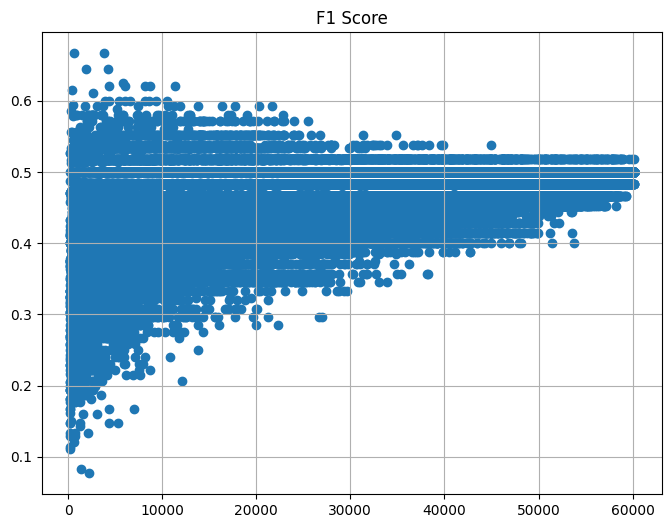

In [4]:
x = random_df['n_genes']*100
y = random_df['f1']


# Create a scatter plot
plt.figure(figsize=(8, 6))  # Define the figure size (optional)

# You can add labels and a title (optional)
#plt.xlabel('X-axis Label')
#plt.ylabel('Y-axis Label')
plt.title('F1 Score')

# Create the scatter plot
plt.scatter(x, y, marker='o')

# Add a legend (optional)
#plt.legend()

# Show the plot
plt.grid(True)  # Add grid lines (optional)
plt.show()

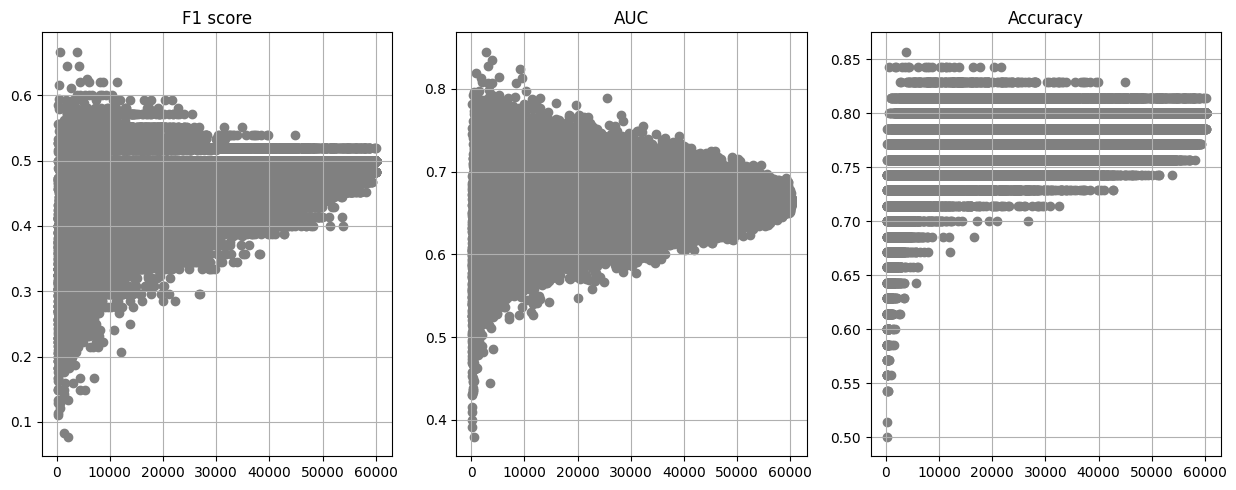

In [5]:
# Set the size of the entire figure
plt.figure(figsize=(12.5, 5))  # 15 inches wide, 5 inches tall

# Plot 1
x1 = random_df['n_genes'] * 100
y1 = random_df['f1']
plt.subplot(1, 3, 1)  # 1 row, 3 columns, plot 1
plt.scatter(x1, y1, marker='o', color = "grey")
plt.title('F1 score')
# Show the plot
plt.grid(True)  # Add grid lines (optional)

# Plot 2
x2 = random_df['n_genes'] * 100
y2 = random_df['auc']
plt.subplot(1, 3, 2)  # 1 row, 3 columns, plot 2
plt.scatter(x2, y2, marker='o', color = "grey")
plt.title('AUC')
# Show the plot
plt.grid(True)  # Add grid lines (optional)

# Plot 3
x3 = random_df['n_genes'] * 100
y3 = random_df['accuracy']
plt.subplot(1, 3, 3)  # 1 row, 3 columns, plot 3
plt.scatter(x3, y3, marker='o', color = "grey")
plt.title('Accuracy')
# Show the plot
plt.grid(True)  # Add grid lines (optional)

# Adjust layout to prevent clipping of titles
plt.tight_layout()



# Show the plots
plt.show()

In [6]:
top_100_f1 = random_df.sort_values(by = 'f1', ascending = False).head(100)

In [7]:
top_100_f1

,n_genes,m_permutation,auc,accuracy,f1
3695,38,96,0.728632,0.857143,0.666667
417,6,18,0.752137,0.842857,0.666667
1792,19,93,0.721154,0.842857,0.645161
4048,42,49,0.777778,0.842857,0.645161
5698,58,99,0.655983,0.828571,0.625000
...,...,...,...,...,...
7524,77,25,0.713675,0.828571,0.571429
15954,161,55,0.680556,0.828571,0.571429
14843,150,44,0.741453,0.828571,0.571429
9978,101,79,0.714744,0.828571,0.571429


In [8]:
print(top_100_f1['n_genes'].median())
print(top_100_f1['n_genes'].mean())

75.5
86.02


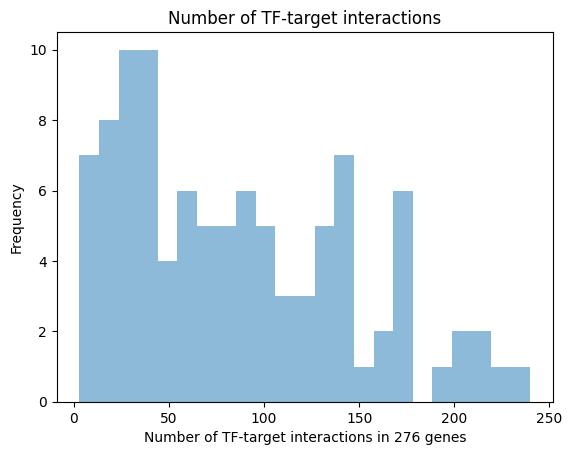

In [9]:
# Visualize the results
plt.hist(top_100_f1['n_genes'], bins = 23, alpha=0.5)
#plt.axvline(57, color='red', linestyle='-', linewidth=1.5)
plt.xlabel('Number of TF-target interactions in 276 genes')
plt.ylabel('Frequency')
plt.title('Number of TF-target interactions')
plt.show()

In [10]:
before = pd.read_csv("df_Logistic_Regression_for_plotting_20231115_before_chemotherapy.csv", index_col=0)
after = pd.read_csv('df_Logistic_Regression_for_plotting_20231115_after_chemotherapy.csv', index_col=0)

In [11]:
before

,n_regulon,m_gene,auc,accuracy,f1,num_gene
0,1,1,0.536325,0.742857,0.000000,2
1,1,2,0.642094,0.742857,0.000000,3
2,1,3,0.629274,0.742857,0.000000,4
3,1,4,0.649573,0.757143,0.105263,5
4,1,5,0.635684,0.742857,0.100000,6
...,...,...,...,...,...,...
9995,100,96,0.720085,0.714286,0.411765,5132
9996,100,97,0.722222,0.714286,0.411765,5157
9997,100,98,0.721154,0.714286,0.411765,5188
9998,100,99,0.714744,0.714286,0.411765,5218


In [12]:
#df = before

In [13]:
#df = df[df["num_gene"] >= 100]

In [14]:
#max(df['num_gene'])

In [15]:
random_df = random_df[random_df["n_genes"] <= 60]

In [16]:
!ls GRN_ML_analysis

5y_result_after_logfc.csv  rf_before.csv
5y_result_after_padj.csv   rf_control.csv
5y_result_before_logfc.csv svm_after.csv
5y_result_before_padj.csv  svm_before.csv
result_after_logfc.csv     svm_control.csv
result_after_padj.csv      xgb_after.csv
result_before_logfc.csv    xgb_before.csv
result_before_padj.csv     xgb_control.csv
rf_after.csv


In [17]:
before_logfc = pd.read_csv('GRN_ML_analysis/result_before_logfc.csv',index_col=0)
before_padj = pd.read_csv('GRN_ML_analysis/result_before_padj.csv',index_col=0)
after_logfc = pd.read_csv('GRN_ML_analysis/result_after_logfc.csv',index_col=0)
after_padj = pd.read_csv('GRN_ML_analysis/result_after_padj.csv',index_col=0)

In [18]:
#de_logfc = before_logfc
#de_pdj = before_padj

In [19]:
before_logfc

,n_genes,auc,accuracy,f1
0,1,0.000000,0.000000,0.000000
1,2,0.373932,0.742857,0.000000
2,3,0.394231,0.742857,0.100000
3,4,0.394231,0.742857,0.100000
4,5,0.394231,0.742857,0.100000
...,...,...,...,...
7695,7696,0.696581,0.714286,0.411765
7696,7697,0.696581,0.714286,0.411765
7697,7698,0.697650,0.714286,0.411765
7698,7699,0.696581,0.714286,0.411765


In [20]:
def top1_f1(data):
    value = data.sort_values(by='f1', ascending=False).head(100)['f1']
    return value

def top1_auc(data):
    value = data.sort_values(by='auc', ascending=False).head(100)['auc']
    return value

def top1_accuracy(data):
    value = data.sort_values(by='accuracy', ascending=False).head(100)['accuracy']
    return value

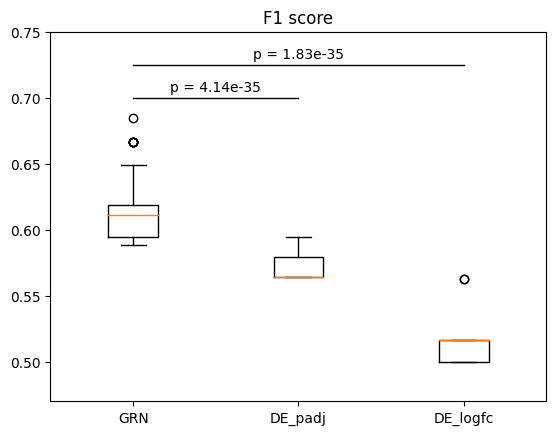

In [44]:
plots = [top1_f1(before), top1_f1(before_padj), top1_f1(before_logfc)]


plt.boxplot(plots)
plt.xticks([1,2,3],['GRN', "DE_padj", "DE_logfc"])

plt.plot([1,2],[0.7, 0.7], color='black', linewidth=1)
plt.plot([1,3],[0.725, 0.725], color='black', linewidth=1)

# Adding text to the plot
plt.text(1.5, 0.705, 'p = 4.14e-35', fontsize=10, color='black', ha='center')
plt.text(2, 0.73, 'p = 1.83e-35', fontsize=10, color='black', ha='center')

plt.ylim(0.47, 0.75)
plt.title('F1 score')

plt.show()

In [37]:
from scipy.stats import mannwhitneyu

statistic, p_value = mannwhitneyu(top1_f1(before), top1_f1(before_padj))
print(statistic)
print("{:.2e}".format(p_value))

9972.5
4.14e-35


In [38]:
statistic, p_value = mannwhitneyu(top1_f1(before), top1_f1(before_logfc))
print(statistic)
print("{:.2e}".format(p_value))

10000.0
1.83e-35


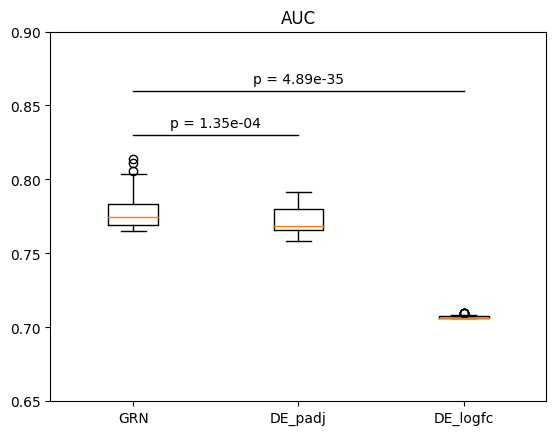

In [58]:
plots = [top1_auc(before), top1_auc(before_padj), top1_auc(before_logfc)]

plt.boxplot(plots)
plt.xticks([1,2,3],['GRN', "DE_padj", "DE_logfc"])

plt.plot([1,2],[0.83, 0.83], color='black', linewidth=1)
plt.plot([1,3],[0.86, 0.86], color='black', linewidth=1)

# Adding text to the plot
plt.text(1.5, 0.835, 'p = 1.35e-04', fontsize=10, color='black', ha='center')
plt.text(2, 0.865, 'p = 4.89e-35', fontsize=10, color='black', ha='center')

plt.ylim(0.65, 0.9)
plt.title('AUC')

plt.show()

In [47]:
statistic, p_value = mannwhitneyu(top1_auc(before), top1_auc(before_padj))
print(statistic)
print("{:.2e}".format(p_value))

6562.5
1.35e-04


In [57]:
statistic, p_value = mannwhitneyu(top1_auc(before), top1_auc(before_logfc))
print(statistic)
print("{:.2e}".format(p_value))

10000.0
4.89e-35


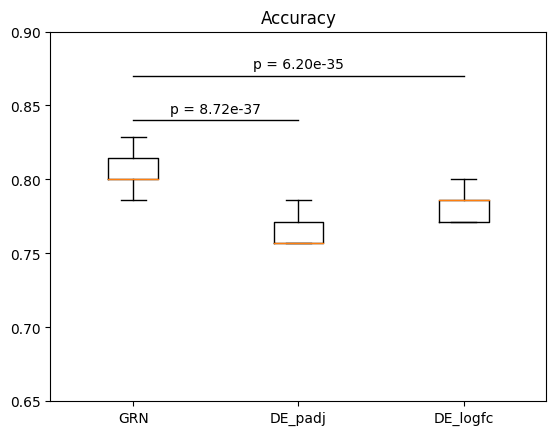

In [63]:
plots = [top1_accuracy(before), top1_accuracy(before_padj), top1_accuracy(before_logfc)]


plt.boxplot(plots)
plt.xticks([1,2,3],['GRN', "DE_padj", "DE_logfc"])

plt.plot([1,2],[0.84, 0.84], color='black', linewidth=1)
plt.plot([1,3],[0.87, 0.87], color='black', linewidth=1)

# Adding text to the plot
plt.text(1.5, 0.845, 'p = 8.72e-37', fontsize=10, color='black', ha='center')
plt.text(2, 0.875, 'p = 6.20e-35', fontsize=10, color='black', ha='center')

plt.ylim(0.65, 0.9)
plt.title('Accuracy')

plt.show()

In [60]:
statistic, p_value = mannwhitneyu(top1_accuracy(before), top1_accuracy(before_padj))
print(statistic)
print("{:.2e}".format(p_value))

9998.5
8.72e-37


In [61]:
statistic, p_value = mannwhitneyu(top1_accuracy(before), top1_accuracy(before_logfc))
print(statistic)
print("{:.2e}".format(p_value))

9849.5
6.20e-35


In [64]:
statistic, p_value = mannwhitneyu(top1_f1(after), top1_f1(after_padj))
print(statistic)
print("{:.2e}".format(p_value))

statistic, p_value = mannwhitneyu(top1_f1(after), top1_f1(after_logfc))
print(statistic)
print("{:.2e}".format(p_value))

10000.0
1.74e-36
10000.0
4.76e-37


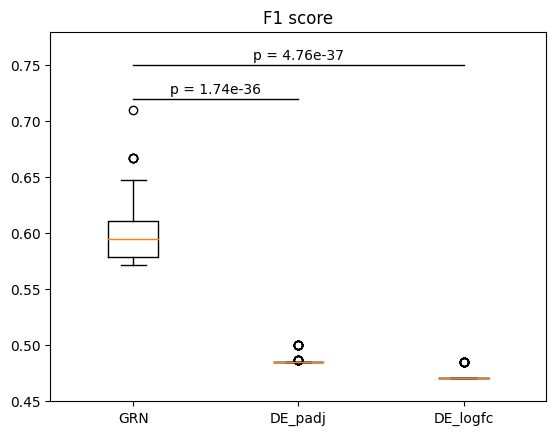

In [67]:
plots = [top1_f1(after), top1_f1(after_padj), top1_f1(after_logfc)]

plt.boxplot(plots)
plt.xticks([1,2,3],['GRN', "DE_padj", "DE_logfc"])

plt.plot([1,2],[0.72, 0.72], color='black', linewidth=1)
plt.plot([1,3],[0.75, 0.75], color='black', linewidth=1)

# Adding text to the plot
plt.text(1.5, 0.725, 'p = 1.74e-36', fontsize=10, color='black', ha='center')
plt.text(2, 0.755, 'p = 4.76e-37', fontsize=10, color='black', ha='center')

plt.ylim(0.45, 0.78)
plt.title('F1 score')

plt.show()

In [68]:
statistic, p_value = mannwhitneyu(top1_auc(after), top1_auc(after_padj))
print(statistic)
print("{:.2e}".format(p_value))

statistic, p_value = mannwhitneyu(top1_auc(after), top1_auc(after_logfc))
print(statistic)
print("{:.2e}".format(p_value))

10000.0
1.29e-34
10000.0
2.09e-34


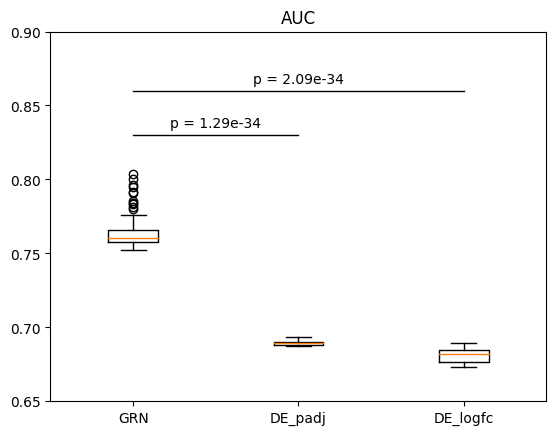

In [70]:
plots = [top1_auc(after), top1_auc(after_padj), top1_auc(after_logfc)]

plt.boxplot(plots)
plt.xticks([1,2,3],['GRN', "DE_padj", "DE_logfc"])

plt.plot([1,2],[0.83, 0.83], color='black', linewidth=1)
plt.plot([1,3],[0.86, 0.86], color='black', linewidth=1)

# Adding text to the plot
plt.text(1.5, 0.835, 'p = 1.29e-34', fontsize=10, color='black', ha='center')
plt.text(2, 0.865, 'p = 2.09e-34', fontsize=10, color='black', ha='center')

plt.ylim(0.65, 0.9)
plt.title('AUC')

plt.show()

In [74]:
statistic, p_value = mannwhitneyu(top1_accuracy(after), top1_accuracy(after_padj))
print(statistic)
print("{:.2e}".format(p_value))

statistic, p_value = mannwhitneyu(top1_accuracy(after), top1_accuracy(after_logfc))
print(statistic)
print("{:.2e}".format(p_value))

10000.0
8.12e-40
10000.0
2.03e-38


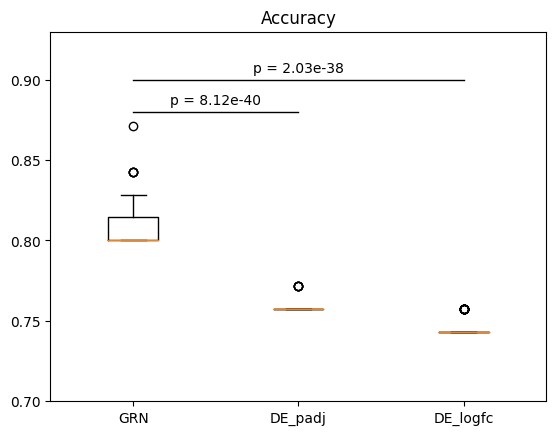

In [75]:
plots = [top1_accuracy(after), top1_accuracy(after_padj), top1_accuracy(after_logfc)]


plt.boxplot(plots)
plt.xticks([1,2,3],['GRN', "DE_padj", "DE_logfc"])

plt.plot([1,2],[0.88, 0.88], color='black', linewidth=1)
plt.plot([1,3],[0.9, 0.9], color='black', linewidth=1)

# Adding text to the plot
plt.text(1.5, 0.885, 'p = 8.12e-40', fontsize=10, color='black', ha='center')
plt.text(2, 0.905, 'p = 2.03e-38', fontsize=10, color='black', ha='center')

plt.ylim(0.7, 0.93)
plt.title('Accuracy')

plt.show()

In [18]:
before_logfc = before_logfc[before_logfc['n_genes'].between(100, 6000)]
before_padj = before_padj[before_padj['n_genes'].between(100, 6000)]
after_logfc = after_logfc[after_logfc['n_genes'].between(100, 6000)]
after_padj = after_padj[after_padj['n_genes'].between(100, 6000)]

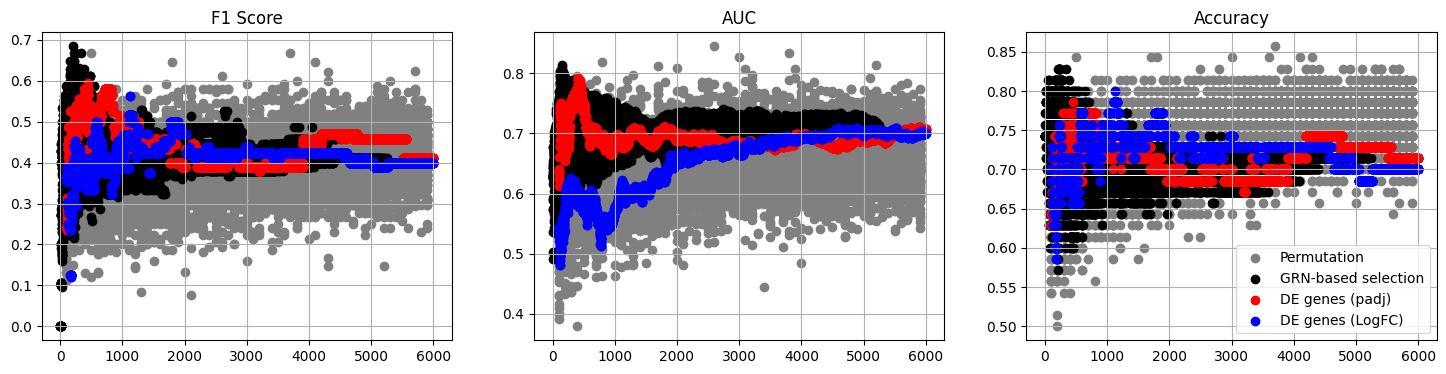

In [25]:
#F1
f1_random_x = (random_df['n_genes']-1)*100
f1_random_y = random_df['f1']

f1_before_x = before['num_gene']
f1_before_y = before['f1']

f1_before_x_pdj = before_padj['n_genes']
f1_before_y_pdj = before_padj['f1']

f1_before_x_logfc = before_logfc['n_genes']
f1_before_y_logfc = before_logfc['f1']

#AUC
auc_random_x = (random_df['n_genes']-1)*100
auc_random_y = random_df['auc']

auc_before_x = before['num_gene']
auc_before_y = before['auc']

auc_before_x_pdj = before_padj['n_genes']
auc_before_y_pdj = before_padj['auc']

auc_before_x_logfc = before_logfc['n_genes']
auc_before_y_logfc = before_logfc['auc']

#acc
accuracy_random_x = (random_df['n_genes']-1)*100
accuracy_random_y = random_df['accuracy']

accuracy_before_x = before['num_gene']
accuracy_before_y = before['accuracy']

accuracy_before_x_pdj = before_padj['n_genes']
accuracy_before_y_pdj = before_padj['accuracy']

accuracy_before_x_logfc = before_logfc['n_genes']
accuracy_before_y_logfc = before_logfc['accuracy']


# Assuming you have three scatter plots, adjust the figsize accordingly
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# You can add labels and a title (optional)
axes[0].set_title('F1 Score')

# Create the scatter plot
axes[0].scatter(f1_random_x, f1_random_y, marker='o', color='grey', label='Permutation')
axes[0].scatter(f1_before_x, f1_before_y, marker='o', color='black', label='GRN-based selection')
axes[0].scatter(f1_before_x_pdj, f1_before_y_pdj, marker='o', color='red', label='DE genes (padj)')
axes[0].scatter(f1_before_x_logfc, f1_before_y_logfc, marker='o', color='blue', label='DE genes (LogFC)')

# You can add labels and a title (optional)
axes[1].set_title('AUC')

# Create the scatter plot
axes[1].scatter(auc_random_x, auc_random_y, marker='o', color='grey', label='Permutation')
axes[1].scatter(auc_before_x, auc_before_y, marker='o', color='black', label='GRN-based selection')
axes[1].scatter(auc_before_x_pdj, auc_before_y_pdj, marker='o', color='red', label='DE genes (padj)')
axes[1].scatter(auc_before_x_logfc, auc_before_y_logfc, marker='o', color='blue', label='DE genes (LogFC)')

# You can add labels and a title (optional)
axes[2].set_title('Accuracy')

# Create the scatter plot
axes[2].scatter(accuracy_random_x, accuracy_random_y, marker='o', color='grey', label='Permutation')
axes[2].scatter(accuracy_before_x, accuracy_before_y, marker='o', color='black', label='GRN-based selection')
axes[2].scatter(accuracy_before_x_pdj, accuracy_before_y_pdj, marker='o', color='red', label='DE genes (padj)')
axes[2].scatter(accuracy_before_x_logfc, accuracy_before_y_logfc, marker='o', color='blue', label='DE genes (LogFC)')

# Set common labels and grid
for ax in axes:
    #ax.set_xlabel('X-axis Label')
    #ax.set_ylabel('Y-axis Label')
    ax.grid(True)

# Add a legend (optional)
plt.legend()

plt.show()

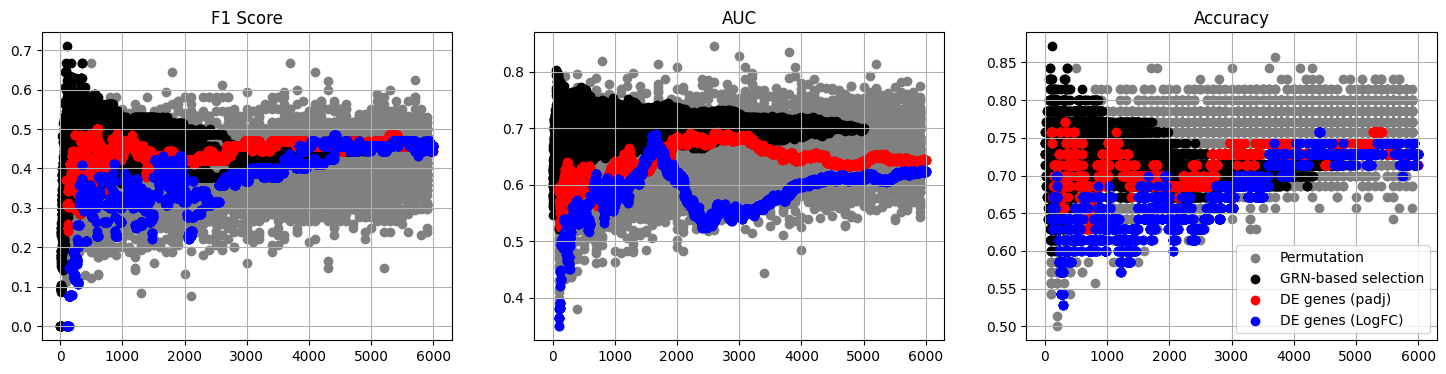

In [26]:
#F1
f1_random_x = (random_df['n_genes']-1)*100
f1_random_y = random_df['f1']

f1_after_x = after['num_gene']
f1_after_y = after['f1']

f1_after_x_pdj = after_padj['n_genes']
f1_after_y_pdj = after_padj['f1']

f1_after_x_logfc = after_logfc['n_genes']
f1_after_y_logfc = after_logfc['f1']

#AUC
auc_random_x = (random_df['n_genes']-1)*100
auc_random_y = random_df['auc']

auc_after_x = after['num_gene']
auc_after_y = after['auc']

auc_after_x_pdj = after_padj['n_genes']
auc_after_y_pdj = after_padj['auc']

auc_after_x_logfc = after_logfc['n_genes']
auc_after_y_logfc = after_logfc['auc']

#acc
accuracy_random_x = (random_df['n_genes']-1)*100
accuracy_random_y = random_df['accuracy']

accuracy_after_x = after['num_gene']
accuracy_after_y = after['accuracy']

accuracy_after_x_pdj = after_padj['n_genes']
accuracy_after_y_pdj = after_padj['accuracy']

accuracy_after_x_logfc = after_logfc['n_genes']
accuracy_after_y_logfc = after_logfc['accuracy']


# Assuming you have three scatter plots, adjust the figsize accordingly
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# You can add labels and a title (optional)
axes[0].set_title('F1 Score')

# Create the scatter plot
axes[0].scatter(f1_random_x, f1_random_y, marker='o', color='grey', label='Permutation')
axes[0].scatter(f1_after_x, f1_after_y, marker='o', color='black', label='GRN-based selection')
axes[0].scatter(f1_after_x_pdj, f1_after_y_pdj, marker='o', color='red', label='DE genes (padj)')
axes[0].scatter(f1_after_x_logfc, f1_after_y_logfc, marker='o', color='blue', label='DE genes (LogFC)')

# You can add labels and a title (optional)
axes[1].set_title('AUC')

# Create the scatter plot
axes[1].scatter(auc_random_x, auc_random_y, marker='o', color='grey', label='Permutation')
axes[1].scatter(auc_after_x, auc_after_y, marker='o', color='black', label='GRN-based selection')
axes[1].scatter(auc_after_x_pdj, auc_after_y_pdj, marker='o', color='red', label='DE genes (padj)')
axes[1].scatter(auc_after_x_logfc, auc_after_y_logfc, marker='o', color='blue', label='DE genes (LogFC)')

# You can add labels and a title (optional)
axes[2].set_title('Accuracy')

# Create the scatter plot
axes[2].scatter(accuracy_random_x, accuracy_random_y, marker='o', color='grey', label='Permutation')
axes[2].scatter(accuracy_after_x, accuracy_after_y, marker='o', color='black', label='GRN-based selection')
axes[2].scatter(accuracy_after_x_pdj, accuracy_after_y_pdj, marker='o', color='red', label='DE genes (padj)')
axes[2].scatter(accuracy_after_x_logfc, accuracy_after_y_logfc, marker='o', color='blue', label='DE genes (LogFC)')

# Set common labels and grid
for ax in axes:
    #ax.set_xlabel('X-axis Label')
    #ax.set_ylabel('Y-axis Label')
    ax.grid(True)

# Add a legend (optional)
plt.legend()

plt.show()


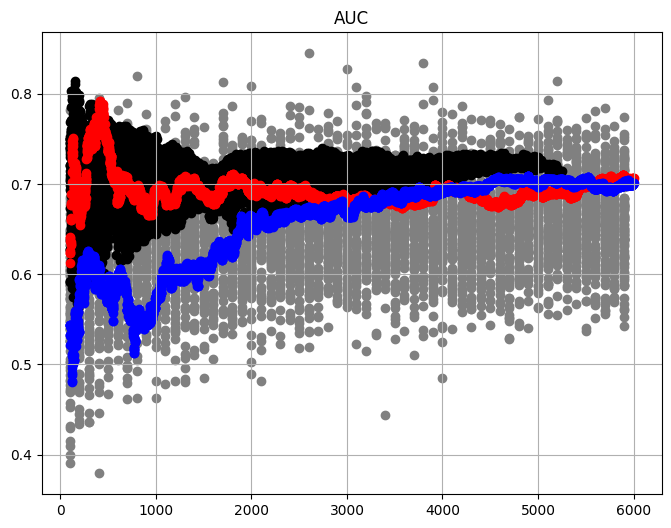

In [24]:
random_x = (random_df['n_genes']-1)*100
random_y = random_df['auc']

x = df['num_gene']
y = df['auc']

x_pdj = de_pdj['n_genes']
y_pdj = de_pdj['auc']

x_logfc = de_logfc['n_genes']
y_logfc = de_logfc['auc']

# Create a scatter plot
plt.figure(figsize=(8, 6))  # Define the figure size (optional)

# You can add labels and a title (optional)
#plt.xlabel('X-axis Label')
#plt.ylabel('Y-axis Label')
plt.title('AUC')

# Create the scatter plot
plt.scatter(random_x, random_y, marker='o', color='grey', label='Permutation')
plt.scatter(x, y, marker='o', color='black', label='GRN-based selection')
plt.scatter(x_pdj, y_pdj, marker='o', color='red', label='DE genes (padj)')
plt.scatter(x_logfc, y_logfc, marker='o', color='blue', label='DE genes (LogFC)')

# Add a legend (optional)
#plt.legend()

# Show the plot
plt.grid(True)  # Add grid lines (optional)
plt.show()

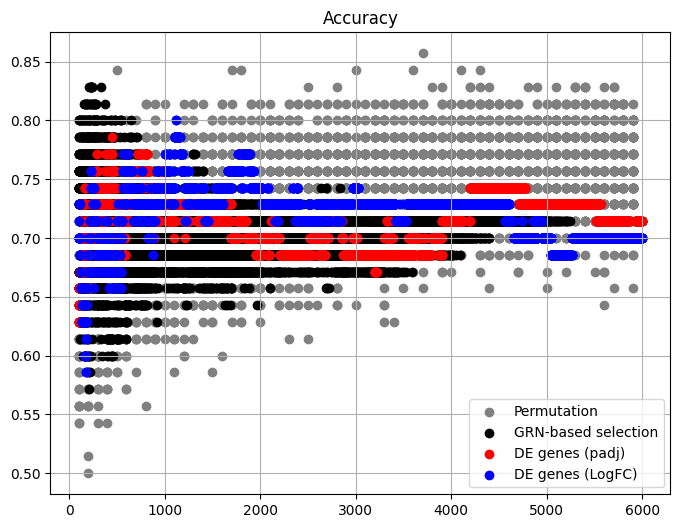

In [25]:
random_x = (random_df['n_genes']-1)*100
random_y = random_df['accuracy']

x = df['num_gene']
y = df['accuracy']

x_pdj = de_pdj['n_genes']
y_pdj = de_pdj['accuracy']

x_logfc = de_logfc['n_genes']
y_logfc = de_logfc['accuracy']

# Create a scatter plot
plt.figure(figsize=(8, 6))  # Define the figure size (optional)

# You can add labels and a title (optional)
#plt.xlabel('X-axis Label')
#plt.ylabel('Y-axis Label')
plt.title('Accuracy')

# Create the scatter plot
plt.scatter(random_x, random_y, marker='o', color='grey', label='Permutation')
plt.scatter(x, y, marker='o', color='black', label='GRN-based selection')
plt.scatter(x_pdj, y_pdj, marker='o', color='red', label='DE genes (padj)')
plt.scatter(x_logfc, y_logfc, marker='o', color='blue', label='DE genes (LogFC)')

# Add a legend (optional)
plt.legend()

# Show the plot
plt.grid(True)  # Add grid lines (optional)
plt.show()

In [31]:
before = pd.read_csv("df_Logistic_Regression_for_plotting_20231115_before_chemotherapy.csv", index_col=0)
after = pd.read_csv('df_Logistic_Regression_for_plotting_20231115_after_chemotherapy.csv', index_col=0)

before_logfc = pd.read_csv('GRN_ML_analysis/result_before_logfc.csv',index_col=0)
before_padj = pd.read_csv('GRN_ML_analysis/result_before_padj.csv',index_col=0)
after_logfc = pd.read_csv('GRN_ML_analysis/result_after_logfc.csv',index_col=0)
after_padj = pd.read_csv('GRN_ML_analysis/result_after_padj.csv',index_col=0)

In [32]:
def top1_f1(data):
    value = data.sort_values(by='f1', ascending=False).head(100)['f1']
    return value

def top1_auc(data):
    value = data.sort_values(by='auc', ascending=False).head(100)['auc']
    return value

def top1_accuracy(data):
    value = data.sort_values(by='accuracy', ascending=False).head(100)['accuracy']
    return value

In [34]:
before_padj

,n_genes,auc,accuracy,f1
0,1,0.540598,0.742857,0.000000
1,2,0.541667,0.742857,0.000000
2,3,0.550214,0.742857,0.000000
3,4,0.563034,0.742857,0.000000
4,5,0.577991,0.742857,0.000000
...,...,...,...,...
7695,7696,0.698718,0.714286,0.411765
7696,7697,0.697650,0.714286,0.411765
7697,7698,0.697650,0.714286,0.411765
7698,7699,0.696581,0.714286,0.411765
